In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# A] Standardization

In [6]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df1=df[['pclass','survived','age','fare']]

In [8]:
df1.head()

,pclass,survived,age,fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500


In [9]:
df=df1

In [10]:
df.head()

,pclass,survived,age,fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500


In [11]:
df.isnull().sum()

pclass        0
survived      0
age         177
fare          0
dtype: int64

In [12]:
df['age'].fillna(df.age.median(),inplace=True)

In [14]:
df.isnull().sum()

pclass      0
survived    0
age         0
fare        0
dtype: int64

In [15]:
X=df.drop('survived',axis=1)

In [16]:
y=df['survived']

In [17]:
X.head()

,pclass,age,fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500


In [18]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split   #first perform train test split then do standardization

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()

In [23]:
X_train_scaled=scaler.fit_transform(X_train)

In [24]:
X_train_scaled

array([[-1.63788124, -1.91971935,  0.98099823],
       [ 0.80326712, -0.0772525 , -0.46963364],
       [ 0.80326712, -2.15002771, -0.40613632],
       ...,
       [ 0.80326712,  0.92075038, -0.34778742],
       [-1.63788124, -1.15202483,  1.72907416],
       [-1.63788124, -0.61463866,  0.8913508 ]])

In [25]:
X_test_scaled=scaler.transform(X_test)

In [26]:
X_test_scaled

array([[ 8.03267115e-01, -7.72524961e-02, -3.25477555e-01],
       [-4.17307062e-01,  1.53055861e-01, -4.18557274e-01],
       [ 8.03267115e-01, -6.91408115e-01, -4.69060935e-01],
       [-4.17307062e-01, -1.76618045e+00,  2.27368556e-02],
       [ 8.03267115e-01, -1.15202483e+00, -4.04010258e-01],
       [-1.63788124e+00, -2.30791401e-01,  9.21996226e-01],
       [ 8.03267115e-01, -7.72524961e-02, -4.72493223e-01],
       [ 8.03267115e-01, -9.98485925e-01, -2.71459231e-01],
       [ 8.03267115e-01, -9.98485925e-01, -4.72493223e-01],
       [-1.63788124e+00, -7.68177567e-01, -1.08998268e-01],
       [-1.63788124e+00,  6.13672575e-01,  4.16959611e-01],
       [ 8.03267115e-01,  1.15105874e+00, -4.66609301e-01],
       [ 8.03267115e-01, -7.72524961e-02, -1.25014303e-01],
       [ 8.03267115e-01,  7.62864086e-02, -4.82790086e-01],
       [-4.17307062e-01,  5.36903123e-01, -3.69524593e-01],
       [-1.63788124e+00, -9.98485925e-01,  1.48260519e-01],
       [-1.63788124e+00,  9.97519837e-01

In [27]:
from sklearn.linear_model import LogisticRegression
classification=LogisticRegression()

In [28]:
classification.fit(X_train_scaled,y_train)

LogisticRegression()

In [30]:
classification.predict(X_test_scaled)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)

# Gaussian Transformation

In [31]:
#algorithms like regression and ann work well with gaussian data so we have to convert non guassian to gaussian by few techniques

In [32]:
df.head()

,pclass,survived,age,fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500


# Logarithmic transformation

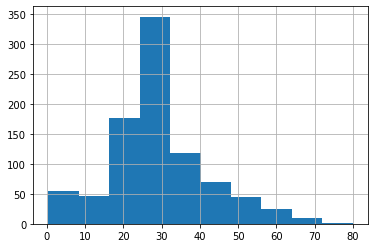

In [33]:
df.age.hist(bins=10)

In [34]:
df['age_log']=np.log(df['age'])

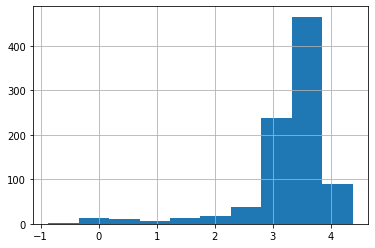

In [35]:
df['age_log'].hist(bins=10)

# Reciprocal transformation

In [36]:
df['age_reciprocal']=1/df.age

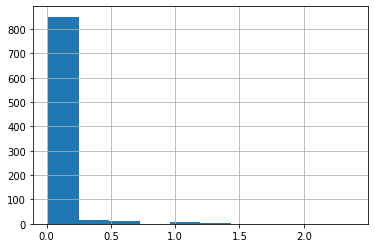

In [37]:
df.age_reciprocal.hist(bins=10)

# Square root transformation

In [38]:
df['age_root']=df.age**(1/2)

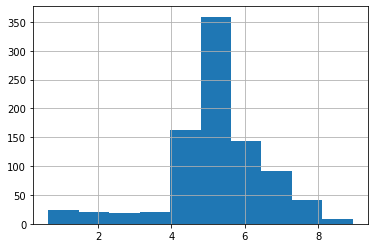

In [39]:
df.age_root.hist(bins=10)

# Exponential transformation

In [40]:
df['age_exp']=df.age**(1/1.2)

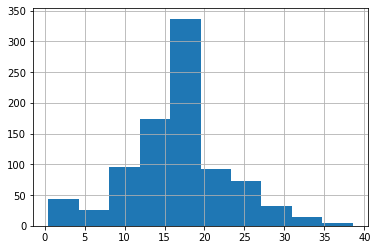

In [41]:
df.age_exp.hist(bins=10)

# From this we can conclude that exponential trans is giving me the best guassian distribution

# Min Max Scaling

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
min_max=MinMaxScaler()

In [44]:
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns) #we can also do it on x_train
df_minmax.head()

,pclass,survived,age,fare,age_log,age_reciprocal,age_root,age_exp
0,1.0,0.0,0.271174,0.014151,0.754076,0.013914,0.487252,0.332613
1,0.0,1.0,0.472229,0.139136,0.858189,0.005833,0.664924,0.531852
2,1.0,1.0,0.321438,0.015469,0.785899,0.010961,0.536504,0.384200
3,0.0,1.0,0.434531,0.103644,0.842523,0.006786,0.634990,0.495779
4,1.0,0.0,0.434531,0.015713,0.842523,0.006786,0.634990,0.495779
